In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm

import pickle

from os import listdir
from os.path import isfile, join
import operator
from PIL import Image
from keras.preprocessing import image

import os
import math

import PIL.Image
from sklearn.metrics import pairwise
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
from scipy import stats

from sklearn.svm import SVC

Using Theano backend.


## Generate Data

In [4]:
mu_1 = np.array([-4,-4])
sigma_1 = np.array([[3,1],[1,3]])

mu_2 = np.array([3,3])
sigma_2 = np.array([[3,2],[2,3]])

n = 50
g1 = multivariate_normal(mu_1, sigma_1)
z1 = g1.rvs(n)
g2 = multivariate_normal(mu_2, sigma_2)
z2 = g2.rvs(n)

In [5]:
x = np.concatenate((z1,z2))
y = np.concatenate((np.zeros(n),np.ones(n)))
#training = (x,y)
#pickle.dump(training,open('training.pkl','wb'))
x,y = pickle.load(open('training.pkl','rb'))

In [6]:
svc = SVC(kernel = 'linear')

lm = linear_model.SGDClassifier(alpha=.1,random_state=1)
#lm = SVC(kernel = 'linear')

## Use SVC

In [7]:
lm = SVC(kernel = 'linear')

In [16]:
n = 100
cavs_list = np.empty((n,2))
coef_list = np.empty((n))

for i in range(n):
    lm = linear_model.SGDClassifier(alpha=0.1,random_state=i)
    lm.fit(x_train,y_train)
    this_cav = lm.coef_[0]
    cavs_list[i] = this_cav
    b = lm.intercept_
    coef_list[i] = b

In [44]:
cav_seeds = np.empty((100,2))
int_ = np.empty((100,1))

for seed in range(100):
    lm = linear_model.SGDClassifier(alpha=.1,random_state=seed)
    lm.fit(x_train, y_train)
    cav_seeds[seed] =  -lm.coef_[0]
    int_[seed] = lm.intercept_
cav_params = cav_seeds.mean(axis=0)
int_param = int_.mean(axis=0)

In [46]:
#int_[5]

In [47]:
#int_param

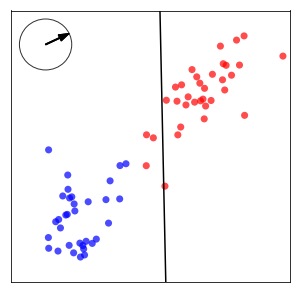

In [79]:
#lm = linear_model.SGDClassifier(alpha=0.1,random_state=1,max_iter=100000, tol=0.001)
lm = SVC(kernel = 'linear',random_state=3,C=.1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=3)
lm.fit(x_train,y_train)
this_cav = lm.coef_[0]

#this_cav = -cav_params

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(x_train[:,0], x_train[:,1], color = color_train,alpha=.7,linewidths=0,s=50)

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = cav_params
b = -int_param
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

#for i in range(n):
#    c0,c1 = cav_seeds[i]
#    b = -int_[i]
#    x_ = np.linspace(-10,10,100)
#    y_ = (-c0/c1)*x_-b/c1
#    plt.plot(x_, y_, 'k',alpha=.05)
    
#c0,c1 = svm_coef_0
#b = svm_coef_1
#x_ = np.linspace(-10,10,100)
#y_ = (-c0/c1)*x_-b/c1
#plt.plot(x_, y_, 'r',alpha=1)

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/svm_0.png',dpi=200)

In [80]:
preds = lm.predict(x_train)
acc = metrics.accuracy_score(y_train,preds)
print(acc)

1.0


In [81]:
lm.predict(np.array([[0,0]]))

array([1.])

In [82]:
svm_coef_0 = lm.coef_[0]
svm_coef_1 = lm.intercept_

In [83]:
lm.coef_

array([[0.54181789, 0.25880178]])

In [84]:
lm.coef_

array([[0.54181789, 0.25880178]])

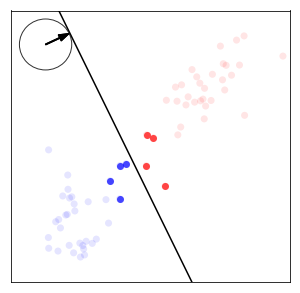

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=3)
lm.fit(x_train,y_train)
this_cav = lm.coef_[0]

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(x_train[:,0], x_train[:,1], color = color_train, alpha = .1,linewidths=0,s=50)

for s in lm.support_:
    if y_train[s]==1:
        this_color = 'red'
    else:
        this_color = 'blue'
    plt.scatter(x_train[s,0], x_train[s,1], color = this_color, alpha = .7,linewidths=0,s=50)


ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = lm.coef_[0]
b = lm.intercept_
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/svm_1.png',dpi=200)


In [86]:
toy_cavs = []
original_CAV = this_cav

for idx, x_point in enumerate(x_train):
    if y_train[idx]==1:
        x_train_new = np.delete(x_train, idx, axis=0)
        y_train_new = np.delete(y_train, idx, axis=0)
        
        new_lm = SVC(kernel = 'linear')        
        new_lm.fit(x_train_new,y_train_new)
        cav_params = new_lm.coef_[0]
        
        sim = euclidean_distance(vec_norm(cav_params),vec_norm(original_CAV))
        cosine_sim = cosine_similarity(cav_params,original_CAV)
        toy_cavs.append([idx,new_lm,sim,cosine_sim,x_point])
        
cavs_sims = np.array([a[2] for a in toy_cavs])
cos_sims = np.array([a[3] for a in toy_cavs]) 

In [87]:
cos_sims

array([0.91114571, 0.91114571, 0.91114571, 0.91114571, 0.91114571,
       0.91114571, 0.91114571, 0.91114571, 0.91114571, 0.91114571,
       0.91114571, 0.91114571, 0.91114571, 0.91114571, 0.91114571,
       0.91114571, 0.91114571, 0.91114571, 0.91114571, 0.91114571,
       0.91114571, 0.91114571, 0.87162671, 0.91114571, 0.91114571,
       0.91114571, 0.91114571, 0.91114571, 0.91114571, 0.91114571,
       0.99406658, 0.91114571, 0.91114571, 0.91114571])

In [88]:
cos_sims.argmin()

22

NameError: name 'this_svm' is not defined

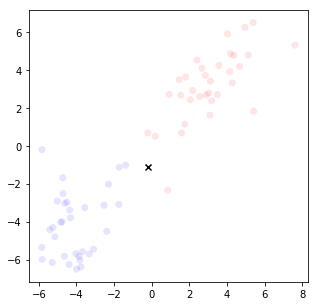

In [89]:
i = 30
lm = toy_cavs[i][1]

idx = toy_cavs[i][0]
this_cav = lm.coef_[0]

x_train_new = np.delete(x_train, idx, axis=0)
y_train_new = np.delete(y_train, idx, axis=0)

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train_new]
plt.scatter(x_train_new[:,0], x_train_new[:,1], color = color_train, alpha = .1,linewidths=0,s=50)

plt.scatter(x_train[idx,0], x_train[idx,1], color = 'k', alpha = 1, marker='x')

for s in this_svm.support_:
    if y_train_new[s]==1:
        this_color = 'red'
    else:
        this_color = 'blue'
    plt.scatter(x_train_new[s,0], x_train_new[s,1], color = this_color, alpha = .7,linewidths=0,s=50)

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)


arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = lm.coef_[0]
b = lm.intercept_
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/svm_2.png',dpi=200)

## Use SGD

In [181]:
lm = linear_model.SGDClassifier(alpha=.1,random_state=1)

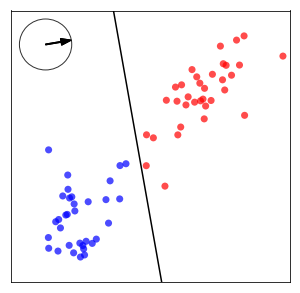

In [248]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=3)
lm.fit(x_train,y_train)
this_cav = lm.coef_[0]

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(x_train[:,0], x_train[:,1], color = color_train, alpha = .7,linewidths=0,s=50)

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = lm.coef_[0]
b = lm.intercept_
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/sgd_0.png',dpi=200)

In [249]:
toy_cavs = []
original_CAV = this_cav

for idx, x_point in enumerate(x_train):
    if y_train[idx]==1:
        x_train_new = np.delete(x_train, idx, axis=0)
        y_train_new = np.delete(y_train, idx, axis=0)
        
        new_lm = linear_model.SGDClassifier(alpha=.1,random_state=1)        
        new_lm.fit(x_train_new,y_train_new)
        cav_params = new_lm.coef_[0]
        
        sim = euclidean_distance(vec_norm(cav_params),vec_norm(original_CAV))
        cosine_sim = cosine_similarity(cav_params,original_CAV)
        toy_cavs.append([idx,new_lm,sim,cosine_sim,x_point])
        
cavs_sims = np.array([a[2] for a in toy_cavs])
cos_sims = np.array([a[3] for a in toy_cavs]) 

In [250]:
cos_sims

array([0.99491835, 0.99491835, 0.99491835, 0.99491835, 0.99491835,
       0.99491835, 0.99491835, 0.99491835, 0.99491835, 0.9958763 ,
       0.99930574, 0.99930574, 0.99930574, 0.99930574, 0.99930574,
       0.99930574, 0.99930574, 0.99930574, 0.99930574, 0.99930574,
       0.99930574, 0.99930574, 0.99972349, 0.98764422, 0.98764422,
       0.98764422, 0.99157135, 0.99157135, 0.99157135, 0.85823822,
       0.97761777, 0.99869482, 0.99869482, 0.99869482])

In [251]:
cos_sims.argmin()

29

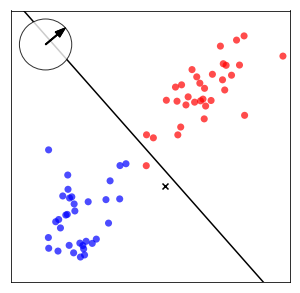

In [252]:
i = 29
this_lm = toy_cavs[i][1]

idx = toy_cavs[i][0]
this_cav = this_lm.coef_[0]

x_train_new = np.delete(x_train, idx, axis=0)
y_train_new = np.delete(y_train, idx, axis=0)

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train_new]
plt.scatter(x_train_new[:,0], x_train_new[:,1], color = color_train, alpha = .7,linewidths=0,s=50)

plt.scatter(x_train[idx,0], x_train[idx,1], color = 'k', alpha = 1, marker='x')

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = this_lm.coef_[0]
b = this_lm.intercept_
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/sgd_1.png',dpi=200)

In [253]:
toy_cavs = []
original_CAV = this_cav

for idx in range(100):  
    new_lm = linear_model.SGDClassifier(alpha=.1,random_state=idx)        
    new_lm.fit(x_train_new,y_train_new)
    cav_params = new_lm.coef_[0]

    sim = euclidean_distance(vec_norm(cav_params),vec_norm(original_CAV))
    cosine_sim = cosine_similarity(cav_params,original_CAV)
    toy_cavs.append([idx,new_lm,sim,cosine_sim,x_point])
        
cavs_sims = np.array([a[2] for a in toy_cavs])
cos_sims = np.array([a[3] for a in toy_cavs]) 

In [254]:
cos_sims.argmin()

50

In [255]:
toy_cavs[33][1].coef_

array([[0.69314482, 0.42973178]])

In [232]:
#cos_sims

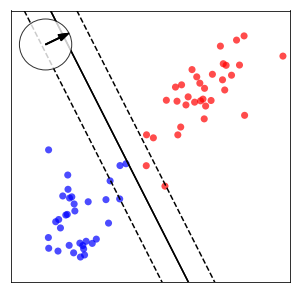

In [258]:
idx = 50
lm = toy_cavs[idx][1]
this_cav = toy_cavs[idx][1].coef_[0]


light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(x_train[:,0], x_train[:,1], color = color_train, alpha = .7,linewidths=0,s=50)

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = lm.coef_[0]
b = lm.intercept_
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')


xx = np.linspace(-8,8, 10)
yy = np.linspace(-8,8, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = lm.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/sgd_2.png',dpi=200)

In [220]:
## Use Center of Mass

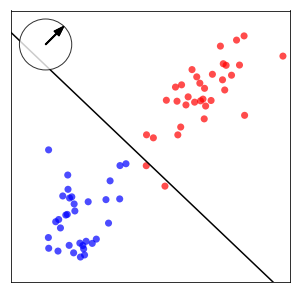

In [489]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=3)

x_train_p_list,x_train_n_list =[],[]
for idx,a in enumerate(x_train):
    if y_train[idx] == 1:
        x_train_p_list.append(a)
    else:
        x_train_n_list.append(a)

x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

mu_p = (x_train_p).mean(axis=0)
mu_n = (x_train_n).mean(axis=0)

mu_orig = mu_p

this_cav =  mu_p - mu_n

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(x_train[:,0], x_train[:,1], color = color_train, alpha = .7,linewidths=0,s=50)

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = this_cav[0],this_cav[1]
b = -.5 * (np.dot(mu_p,mu_p.T) - np.dot(mu_n,mu_n.T))
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/L1_1.png',dpi=200)

In [472]:
x_train.shape

(67, 2)

In [ ]:
cav_seeds = np.empty((100,2))
int_ = np.empty((100,1))

for seed in range(100):
    lm = linear_model.SGDClassifier(alpha=.1,random_state=seed)
    lm.fit(x_train, y_train)
    cav_seeds[seed] =  -lm.coef_[0]
    int_[seed] = lm.intercept_
cav_params = cav_seeds.mean(axis=0)
int_param = int_.mean(axis=0)

In [491]:
toy_cavs = []
original_CAV = this_cav

for idx, x_point in enumerate(x_train):
    if y_train[idx]==1:
        x_train_new = np.delete(x_train, idx, axis=0)
        y_train_new = np.delete(y_train, idx, axis=0)
        
        x_train_p_list,x_train_n_list =[],[]
        for idx_2,a in enumerate(x_train_new):
            if y_train_new[idx_2] == 1:
                x_train_p_list.append(a)
            else:
                x_train_n_list.append(a)

        x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

        mu_p = (x_train_p).mean(axis=0)
        mu_n = (x_train_n).mean(axis=0)

        cav_params =  mu_p - mu_n
                        
        sim = euclidean_distance(vec_norm(cav_params),vec_norm(original_CAV))
        cosine_sim = cosine_similarity(cav_params,original_CAV)
        dist = euclidean_distance(mu_p,x_point)
        toy_cavs.append([idx,cav_params,sim,cosine_sim,x_point,dist])
        
cavs_sims = np.array([a[2] for a in toy_cavs])
cos_sims = np.array([a[3] for a in toy_cavs]) 
dist = np.array([a[5] for a in toy_cavs]) 

In [492]:
dist

array([0.65100579, 0.28468247, 4.3413406 , 0.63262743, 3.88367368,
       1.62514317, 1.62096435, 5.3253434 , 2.85065834, 3.88903303,
       2.12937744, 2.25435808, 2.83122819, 1.48286107, 1.37538418,
       0.82596562, 2.82024051, 3.13292462, 0.6986103 , 1.37530676,
       1.11475729, 1.50965053, 4.08407821, 0.40731814, 0.39097509,
       2.33569534, 2.10549345, 1.1345869 , 1.3375743 , 5.96966954,
       5.42647029, 0.73142867, 1.52538834, 2.27690452])

In [495]:
dist.argmax()

29

In [496]:
np.where(cos_sims<.99999)

(array([ 7, 16, 29]),)

In [497]:
this_lm

array([7.0456903 , 7.21709997])

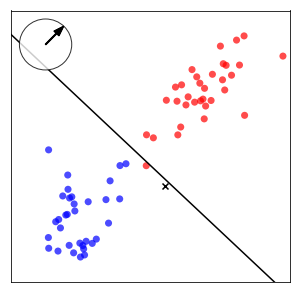

In [498]:
i = 29
this_lm = toy_cavs[i][1]

idx = toy_cavs[i][0]
this_cav = this_lm

x_train_new = np.delete(x_train, idx, axis=0)
y_train_new = np.delete(y_train, idx, axis=0)

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train_new]
plt.scatter(x_train_new[:,0], x_train_new[:,1], color = color_train, alpha = .7,linewidths=0,s=50)

plt.scatter(x_train[idx,0], x_train[idx,1], color = 'k', alpha = 1, marker='x')

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = this_cav[0],this_cav[1]
b = -.5 * (np.dot(mu_p,mu_p.T) - np.dot(mu_n,mu_n.T))
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/mean_updated.png',dpi=200)

## Show Mean

In [261]:
mu_p

array([2.96552379, 3.053528  ])

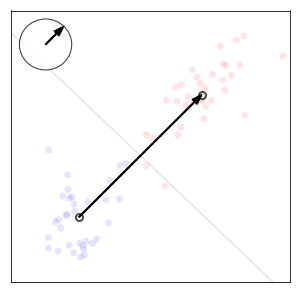

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=3)

x_train_p_list,x_train_n_list =[],[]
for idx,a in enumerate(x_train):
    if y_train[idx] == 1:
        x_train_p_list.append(a)
    else:
        x_train_n_list.append(a)

x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

mu_p = (x_train_p).mean(axis=0)
mu_n = (x_train_n).mean(axis=0)

this_cav =  mu_p - mu_n

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(x_train[:,0], x_train[:,1], color = color_train, alpha = .1,linewidths=0,s=50)


plt.scatter(mu_p[0], mu_p[1], color = 'white', alpha = .7,linewidths=2,s=50,edgecolor='k')
plt.scatter(mu_n[0], mu_n[1], color = 'white', alpha = .7,linewidths=2,s=50,edgecolor='k')


ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)


my_arrow = plt.arrow(mu_n[0], mu_n[1], this_cav[0], this_cav[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = this_cav[0],this_cav[1]
b = -.5 * (np.dot(mu_p,mu_p.T) - np.dot(mu_n,mu_n.T))
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k',alpha=.1)

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/L1_2.png',dpi=200)

## Logistic

In [285]:
lm = linear_model.LogisticRegression()

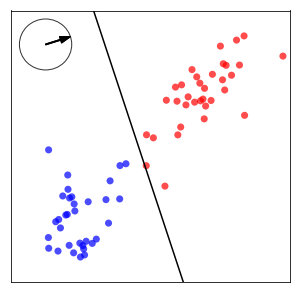

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=3)
lm.fit(x_train,y_train)
this_cav = lm.coef_[0]

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train]
plt.scatter(x_train[:,0], x_train[:,1], color = color_train,alpha=.7,linewidths=0,s=50)

ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = lm.coef_[0]
b = lm.intercept_
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/svm_0.png',dpi=200)

In [296]:
lm.coef_[0]

array([1.33225111, 0.42899329])

In [293]:
this_cav

array([1.33225111, 0.42899329])

In [ ]:
cav_seeds = np.empty((100,2))
int_ = np.empty((100,1))

for seed in range(100):
    lm = linear_model.SGDClassifier(alpha=.1,random_state=seed)
    lm.fit(x_train, y_train)
    cav_seeds[seed] =  -lm.coef_[0]
    int_[seed] = lm.intercept_
cav_params = cav_seeds.mean(axis=0)
int_param = int_.mean(axis=0)

In [58]:
original_CAV = cav_params

In [61]:


toy_cavs = []
#original_CAV = cav_params

for idx, x_point in enumerate(x_train):
    if y_train[idx]==1:
        x_train_new = np.delete(x_train, idx, axis=0)
        y_train_new = np.delete(y_train, idx, axis=0)
        
        #new_lm = linear_model.LogisticRegression()       
        #new_lm.fit(x_train_new,y_train_new)
        #cav_params = new_lm.coef_[0]
        
        cav_seeds = np.empty((100,2))
        int_ = np.empty((100,1))

        for seed in range(100):
            lm = linear_model.SGDClassifier(alpha=.1,random_state=seed)
            lm.fit(x_train_new, y_train_new)
            cav_seeds[seed] =  -lm.coef_[0]
            int_[seed] = lm.intercept_
        cav_params = cav_seeds.mean(axis=0)
        
        sim = euclidean_distance(vec_norm(cav_params),vec_norm(original_CAV))
        cosine_sim = cosine_similarity(cav_params,original_CAV)
        toy_cavs.append([idx,lm,sim,cosine_sim,x_point])
        
cavs_sims = np.array([a[2] for a in toy_cavs])
cos_sims = np.array([a[3] for a in toy_cavs]) 

In [62]:
cos_sims

array([0.99974426, 0.99977879, 0.99968264, 0.99962187, 0.99955687,
       0.99969909, 0.99969473, 0.9996934 , 0.99972632, 0.99990765,
       0.9999965 , 0.99984021, 0.99900608, 0.9994752 , 0.99944726,
       0.99957135, 0.99983707, 0.99983707, 0.99991232, 0.99990654,
       0.99998015, 0.99999413, 0.99967365, 0.99998839, 0.99998837,
       0.99996997, 0.99998005, 0.99996977, 0.99998372, 0.97285431,
       0.99977362, 0.99999789, 0.99997851, 0.99998001])

In [63]:
cos_sims.argmin()

29

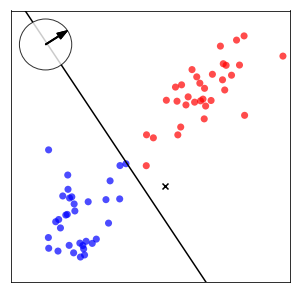

In [64]:
i = 29
lm = toy_cavs[i][1]

idx = toy_cavs[i][0]
this_cav = lm.coef_[0]

x_train_new = np.delete(x_train, idx, axis=0)
y_train_new = np.delete(y_train, idx, axis=0)

light_blue, light_red = '#b3b8fb', '#f6889f'
fig = plt.figure(figsize=[5,5])

# train
color_train = ['red' if y == 1 else 'blue' for y in y_train_new]
plt.scatter(x_train_new[:,0], x_train_new[:,1], color = color_train, alpha = .7,linewidths=0,s=50)

plt.scatter(x_train[idx,0], x_train[idx,1], color = 'k', alpha = 1, marker='x')


ax = plt.gca()
radius = 1.5
circ = plt.Circle((-6,6), radius=radius, edgecolor='black', facecolor='white',zorder=4,alpha=.8)
ax.add_patch(circ)

arrow_start = [-6,6]
cav_norm = vec_norm(this_cav) * radius
my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.05,length_includes_head=True,head_width=.4,fc='k', ec=None, alpha = 1,zorder=5)
a0 = ax.add_patch(my_arrow)

c0,c1 = lm.coef_[0]
b = lm.intercept_
x_ = np.linspace(-10,10,100)
y_ = (-c0/c1)*x_-b/c1
plt.plot(x_, y_, 'k')

my_xlim = plt.xlim([-8,8])
my_ylim = plt.ylim([-8,8])

_,_ = plt.xticks([], []),plt.yticks([], [])
plt.savefig('new_figs/svm_2.png',dpi=200)

In [11]:
def vector_norm(vec):
    norm_const = math.sqrt(vec[0]*vec[0] + vec[1]*vec[1])
    return vec / norm_const

def vec_norm(vec):
    return  vec / np.linalg.norm(vec)

## CAV distance
def euclidean_distance(a,b):
    return np.linalg.norm(a-b)

def cosine_similarity(v1,v2):
    # compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy / math.sqrt(sumxx*sumyy)